<a href="https://colab.research.google.com/github/Psousace/Curso_TradingDados/blob/main/PRV_Gestao_de_Carteiras_AULA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Gestão de Portfólio

##Importando bibliotecas

In [ ]:
pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import yfinance as yf

In [ ]:
#Parâmetros da carteira

#Ativos Selecionados
ativos = ['ABEV3.SA','PETR4.SA','VALE3.SA', 'BRFS3.SA','ALUP4.SA']

#Período Analisado
data_inicio = pd.to_datetime('2019-01-01')
data_fim = pd.to_datetime('2023-01-01')

#Definição dos pesos da carteira 1/n
pesos = np.array([0.20,0.20,0.20,0.20,0.20])


In [ ]:
carteira = yf.download(ativos, start=data_inicio, end=data_fim)['Adj Close']
carteira.head()

[*********************100%***********************]  5 of 5 completed


,ABEV3.SA,ALUP4.SA,BRFS3.SA,PETR4.SA,VALE3.SA
Date,,,,,
2019-01-02,13.950426,4.629724,22.379999,11.060243,36.257858
2019-01-03,14.105910,4.701564,21.490000,11.331460,34.774616
2019-01-04,14.295947,4.549900,21.450001,11.363640,37.038513
2019-01-07,14.235481,4.629724,21.590000,11.542924,36.839802
2019-01-08,13.950426,4.645687,22.930000,11.473967,37.194645


In [ ]:
ativos = np.array(carteira.columns)
ativos

array(['ABEV3.SA', 'ALUP4.SA', 'BRFS3.SA', 'PETR4.SA', 'VALE3.SA'],
      dtype=object)

In [ ]:
#Análise Descritiva Breve

carteira.describe()

,ABEV3.SA,ALUP4.SA,BRFS3.SA,PETR4.SA,VALE3.SA
count,993.000000,993.000000,993.000000,993.000000,993.000000
mean,14.297723,6.920439,23.006264,14.853302,57.583634
std,1.676477,0.956323,7.258074,5.199702,20.751803
min,9.777991,4.424304,6.870000,5.362339,24.841560
25%,13.470256,6.143509,18.209999,11.611874,36.621265
50%,14.477347,6.983351,22.260000,13.251688,62.090466
75%,15.522548,7.650868,26.650000,17.123030,75.765701
max,17.919630,8.895000,40.500000,33.003029,94.871948


##Indicadores

###Retorno diário dos ativos

In [ ]:
retornos = carteira.pct_change()
retornos

,ABEV3.SA,ALUP4.SA,BRFS3.SA,PETR4.SA,VALE3.SA
Date,,,,,
2019-01-02,NaN,NaN,NaN,NaN,NaN
2019-01-03,0.011145,0.015517,-0.039768,0.024522,-0.040908
2019-01-04,0.013472,-0.032258,-0.001861,0.002840,0.065102
2019-01-07,-0.004230,0.017544,0.006527,0.015777,-0.005365
2019-01-08,-0.020024,0.003448,0.062066,-0.005974,0.009632
...,...,...,...,...,...
2022-12-23,0.013870,0.009751,0.035813,0.047103,0.006647
2022-12-26,-0.006840,0.013948,-0.010638,-0.007166,0.009152
2022-12-27,0.000000,-0.026455,-0.033602,0.006816,0.023878


In [ ]:
retornos.dropna(inplace=True)
retornos.head()

,ABEV3.SA,ALUP4.SA,BRFS3.SA,PETR4.SA,VALE3.SA
Date,,,,,
2019-01-03,0.011145,0.015517,-0.039768,0.024522,-0.040908
2019-01-04,0.013472,-0.032258,-0.001861,0.002840,0.065102
2019-01-07,-0.004230,0.017544,0.006527,0.015777,-0.005365
2019-01-08,-0.020024,0.003448,0.062066,-0.005974,0.009632
2019-01-09,0.014242,-0.003436,0.027039,0.020833,0.024423


##CAGR - Compound annual growth rate

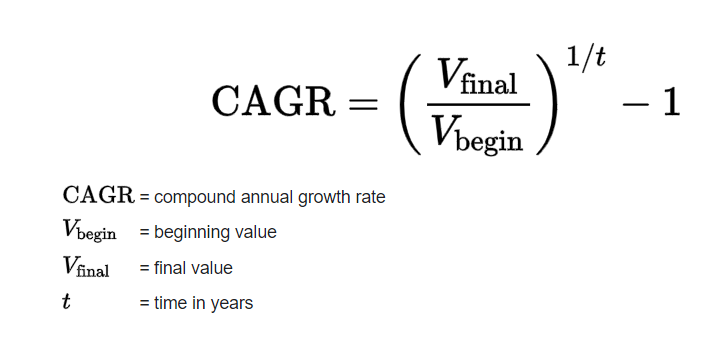

In [ ]:
#Função CAGR cada ativo

def cagr_ativo(data_inicio, data_fim, df_precos):
  n_meses = (data_fim.year - data_inicio.year) * 12 + (data_fim.month - data_inicio.month)
  ativo_anualizado = (df_precos.iloc[-1]-df_precos.iloc[0])/df_precos.iloc[0]
  ativo_anualizado = ((1+ativo_anualizado)**(12/n_meses))-1
  return ativo_anualizado

In [ ]:
cagr_ativo(data_inicio, data_fim, carteira)

ABEV3.SA    0.010054
ALUP4.SA    0.171244
BRFS3.SA   -0.220093
PETR4.SA    0.219973
VALE3.SA    0.244491
dtype: float64

In [ ]:
#Função CAGR Carteira

def cagr_carteira(data_inicio, data_fim, df_precos):
  n_meses = (data_fim.year - data_inicio.year) * 12 + (data_fim.month - data_inicio.month)
  ativo_anualizado = (df_precos.iloc[-1] - df_precos.iloc[0])/df_precos.iloc[0]
  ativo_anualizado = (1+ativo_anualizado)**(12/n_meses)-1
  ativo_anualizado = ativo_anualizado.dot(pesos)
  return ativo_anualizado

In [ ]:
cagr_carteira(data_inicio, data_fim, carteira)

0.0851339650044842

##Comparação com Benchmark

In [ ]:
#Comparação com benchamark

def benchmark_ibov(data_inicio, data_fim, df_precos):
  ibov = yf.download('^BVSP', start=data_inicio, end=data_fim)['Close']
  df_precos = df_precos.pct_change()
  df_precos.fillna(0, inplace=True)
  df_precos = (1+df_precos).cumprod()
  df_precos = pd.Series((df_precos*pesos).sum(axis=1), name='Carteira')
  ibov_retornos = ibov.pct_change()
  ibov_retornos.fillna(0,inplace=True)
  benchmark_ibov = (1+ibov_retornos).cumprod()
  benchmark = pd.merge(df_precos, benchmark_ibov, how='inner', left_index=True, right_index=True)
  benchmark.rename(columns={'Close': 'IBOV'}, inplace=True)
  return benchmark.iloc[-1], benchmark.plot(figsize=(10,6))


[*********************100%***********************]  1 of 1 completed


(Carteira    1.581293
 IBOV        1.208972
 Name: 2022-12-29 00:00:00, dtype: float64,
 <Axes: xlabel='Date'>)

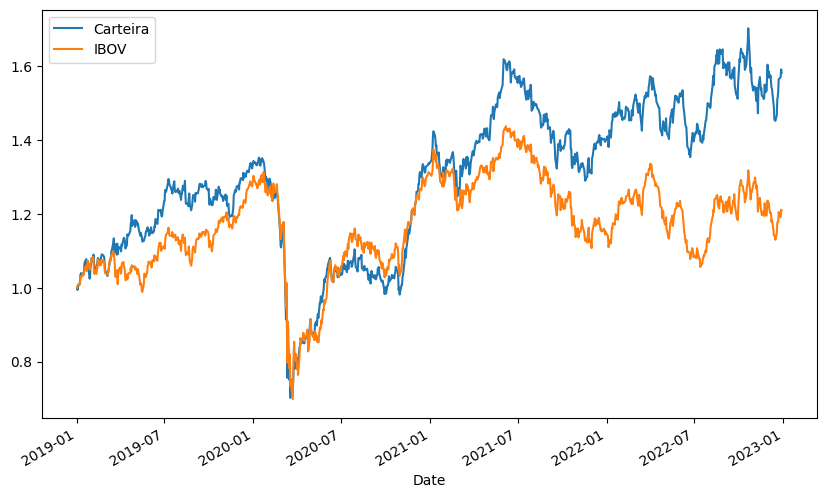

In [ ]:
benchmark_ibov(data_inicio, data_fim, carteira)

##Correlação

<Axes: >

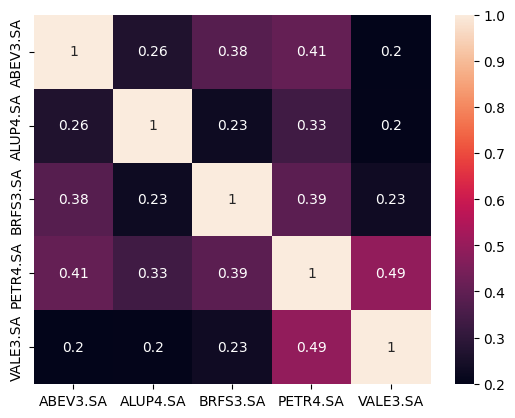

In [ ]:
import seaborn as sns

corr = retornos.corr()
sns.heatmap(corr, annot=True)

##Matriz Covariância

In [ ]:
#matriz covariância

cov = retornos.cov()
cov

,ABEV3.SA,ALUP4.SA,BRFS3.SA,PETR4.SA,VALE3.SA
ABEV3.SA,0.000431,0.000127,0.000245,0.000253,0.000112
ALUP4.SA,0.000127,0.000531,0.000164,0.000231,0.000126
BRFS3.SA,0.000245,0.000164,0.000970,0.000362,0.000194
PETR4.SA,0.000253,0.000231,0.000362,0.000896,0.000399
VALE3.SA,0.000112,0.000126,0.000194,0.000399,0.000732


In [ ]:
retornos.var()

ABEV3.SA    0.000431
ALUP4.SA    0.000531
BRFS3.SA    0.000970
PETR4.SA    0.000896
VALE3.SA    0.000732
dtype: float64

##Volatilidade da carteira

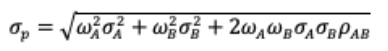

In [ ]:
#Função Volatilidade da carteira

def vol_carteira(df_precos, pesos, cov):

  vol_diaria = np.sqrt(np.dot(pesos.T, np.dot(cov,pesos)))
  vol_anualizada = vol_diaria*np.sqrt(252)
  return vol_anualizada

In [ ]:
vol_carteira(carteira, pesos, cov)

0.2837627429822058

##Contribuição Marginal de Risco

In [ ]:
import plotly.graph_objects as go

In [ ]:
def contribuicao_marginal_risco(ativos, cov_matrix, pesos):
  #Calcular o risco total da carteira
  portfolio_var = np.dot(pesos.T, np.dot(cov_matrix.values, pesos))

  #Calcular a contribuição de risco de cada ativo
  contribuicao_risco = []
  for i, symbol in enumerate(ativos):
    variancia = cov_matrix.iloc[i][i]
    pesos_ativos = pesos[i]
    cm_ativos = pesos_ativos**2 * variancia/portfolio_var
    contribuicao_risco.append(cm_ativos)

  return pd.Series(contribuicao_risco, index=carteira.columns, name='Contribuicao Marginal de Risco')

In [ ]:
mrc = contribuicao_marginal_risco(ativos, cov, pesos)

In [ ]:
mrc

ABEV3.SA    0.053970
ALUP4.SA    0.066427
BRFS3.SA    0.121375
PETR4.SA    0.112200
VALE3.SA    0.091614
Name: Contribuicao Marginal de Risco, dtype: float64

In [ ]:
fig = go.Figure(data=[go.Bar(x=mrc.index, y=mrc.values)])
fig.update_layout(title='Contribuição Marginal de Risco Carteira',
                  xaxis_title='Ativos',
                  yaxis_title='Contribuição Marginal de Risco (%)',
                  template='simple_white',
                  height=400,
                  width=500)
fig.show()

##Janela de Volatilidade

In [ ]:
#Janela de volatilidade

def janela_volatilidade(df_precos, tam_janela, pesos):
  retornos = df_precos.pct_change()
  retornos = pd.Series((retornos*pesos).sum(axis=1), name='Carteira')
  rolling_vol = retornos.rolling(window=tam_janela).std()
  return rolling_vol.plot(figsize=(10,6))

<Axes: xlabel='Date'>

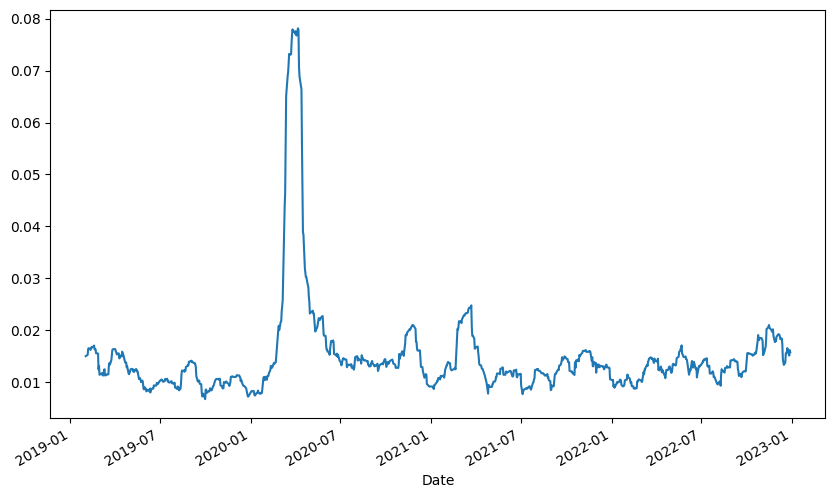

In [ ]:
janela_volatilidade(carteira, 22, pesos)

##Sharpe Ratio

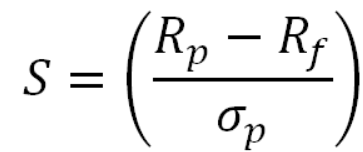

In [ ]:
#Função Sharpe Ratio

def sharpe_ratio(df_precos, rf, vol_ano, pesos):
  retornos = df_precos.pct_change().dropna()
  retornos = (retornos*pesos).sum(axis=1)
  sharpe_ratio = ((retornos.mean()*252)-rf)/(vol_ano)
  return display(sharpe_ratio)

In [ ]:
sharpe_ratio(carteira,0.1375, 0.28, pesos)

0.07798369970645598

##Max Drawdown

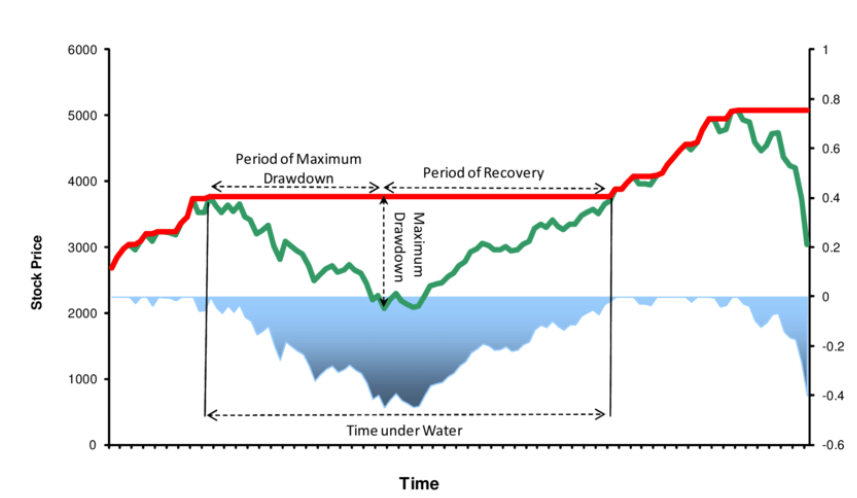

In [ ]:
#Max Drawdown

def max_drawdown(df_precos):
  retornos = df_precos.pct_change()
  retornos.fillna(0,inplace=True)
  retornos = (1+retornos).cumprod()
  retornos = pd.Series((retornos*pesos).sum(axis=1),name='Carteira')
  pico = retornos.expanding(min_periods=1).max()
  dd = (retornos/pico)-1
  drawdown = dd.min()
  return display(drawdown)

In [ ]:
max_drawdown(carteira)

-0.4809518814159255

##Otimização de Carteiras

#Hierachical Equal Risk Contribution

In [ ]:
#1º passo ajustar versão da matplotlib
!pip uninstall matplotlib
!pip install matplotlib

Found existing installation: matplotlib 3.7.1
Uninstalling matplotlib-3.7.1:
  Would remove:
    /usr/local/lib/python3.9/dist-packages/matplotlib-3.7.1-py3.9-nspkg.pth
    /usr/local/lib/python3.9/dist-packages/matplotlib-3.7.1.dist-info/*
    /usr/local/lib/python3.9/dist-packages/matplotlib/*
    /usr/local/lib/python3.9/dist-packages/mpl_toolkits/axes_grid1/*
    /usr/local/lib/python3.9/dist-packages/mpl_toolkits/axisartist/*
    /usr/local/lib/python3.9/dist-packages/mpl_toolkits/mplot3d/*
    /usr/local/lib/python3.9/dist-packages/pylab.py
Proceed (Y/n)? Y
  Successfully uninstalled matplotlib-3.7.1
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 80.0 MB/s eta 0:00:00


In [ ]:
#2º passo

exit()

In [ ]:
#3º passo

!pip install cvxpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#4º passo
!pip install pybind11

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.3/222.3 kB 5.4 MB/s eta 0:00:00


In [ ]:
!pip install riskfolio-lib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.2/220.2 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.7/152.7 kB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.5/920.5 kB 30.9 MB/s eta 0:00:00


In [ ]:
import riskfolio as rp
import yfinance as yf

##Parâmetros

In [ ]:
#Parâmetros in sample

inicio = '2018-01-01'
fim = '2020-12-31'

#Seleção de ativos

ativos = ['PETR4.SA','VALE3.SA', 'BBDC4.SA','ITSA4.SA', 'ABEV3.SA' ,'WEGE3.SA', 'CYRE3.SA' ]

In [ ]:
#Extrair dados de cotação da carteira

carteira_in = yf.download(ativos, start=inicio, end=fim)['Adj Close']
carteira_in.head()

[*********************100%***********************]  7 of 7 completed


,ABEV3.SA,BBDC4.SA,CYRE3.SA,ITSA4.SA,PETR4.SA,VALE3.SA,WEGE3.SA
Date,,,,,,,
2018-01-02,18.143394,15.310585,9.772964,6.376586,7.292882,28.455341,8.906307
2018-01-03,18.185215,15.380966,9.816987,6.451741,7.358979,28.284832,8.771041
2018-01-04,18.084841,15.633329,9.897694,6.573145,7.372199,28.400772,8.685607
2018-01-05,18.151758,15.721881,10.051775,6.584707,7.416265,28.844109,8.721204
2018-01-08,18.118296,15.717454,10.103132,6.578928,7.504398,29.485245,8.792402


In [ ]:
#Análise descritiva

carteira_in.describe()

,ABEV3.SA,BBDC4.SA,CYRE3.SA,ITSA4.SA,PETR4.SA,VALE3.SA,WEGE3.SA
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,14.919310,18.106547,16.062016,8.076561,10.834334,37.340378,15.182280
std,2.437493,3.253881,6.031221,1.128945,2.089848,6.825291,9.388854
min,9.777991,11.585314,7.648178,5.629783,5.362338,24.841558,7.079746
25%,13.142719,15.249236,10.919830,7.144695,9.256349,33.319231,8.647032
50%,15.254769,17.583082,13.640220,8.097929,11.024720,36.158493,10.296416
75%,16.323727,21.182337,21.297718,8.962240,12.508484,39.494026,19.126017
max,20.366478,24.515461,29.269833,10.528179,14.633627,66.635307,41.331150


In [ ]:
#retornos

retornos_in = carteira_in.pct_change().dropna()
retornos_in.head()

,ABEV3.SA,BBDC4.SA,CYRE3.SA,ITSA4.SA,PETR4.SA,VALE3.SA,WEGE3.SA
Date,,,,,,,
2018-01-03,0.002305,0.004597,0.004505,0.011786,0.009063,-0.005992,-0.015188
2018-01-04,-0.005520,0.016408,0.008221,0.018817,0.001796,0.004099,-0.009740
2018-01-05,0.003700,0.005664,0.015567,0.001759,0.005977,0.015610,0.004098
2018-01-08,-0.001843,-0.000282,0.005109,-0.000878,0.011884,0.022228,0.008164
2018-01-09,-0.002770,-0.009296,-0.004357,-0.015817,0.000000,-0.003701,0.016194


In [ ]:
#Construir o objeto portfolio

portfolio_in = rp.HCPortfolio(returns=retornos_in)

#Realizar a otimizaçao

pesos = portfolio_in.optimization(model='HERC',
                         codependence='pearson',
                         rm='MV',
                         rf=0,
                         linkage='ward',
                         max_k=10,
                         leaf_order=True)

In [ ]:
display(pesos.T)

,ABEV3.SA,BBDC4.SA,CYRE3.SA,ITSA4.SA,PETR4.SA,VALE3.SA,WEGE3.SA
weights,0.336176,0.096364,0.054568,0.135344,0.058689,0.085185,0.233674


##Representação gráfica dos clusters

/usr/local/lib/python3.9/dist-packages/riskfolio/src/PlotFunctions.py:2446: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


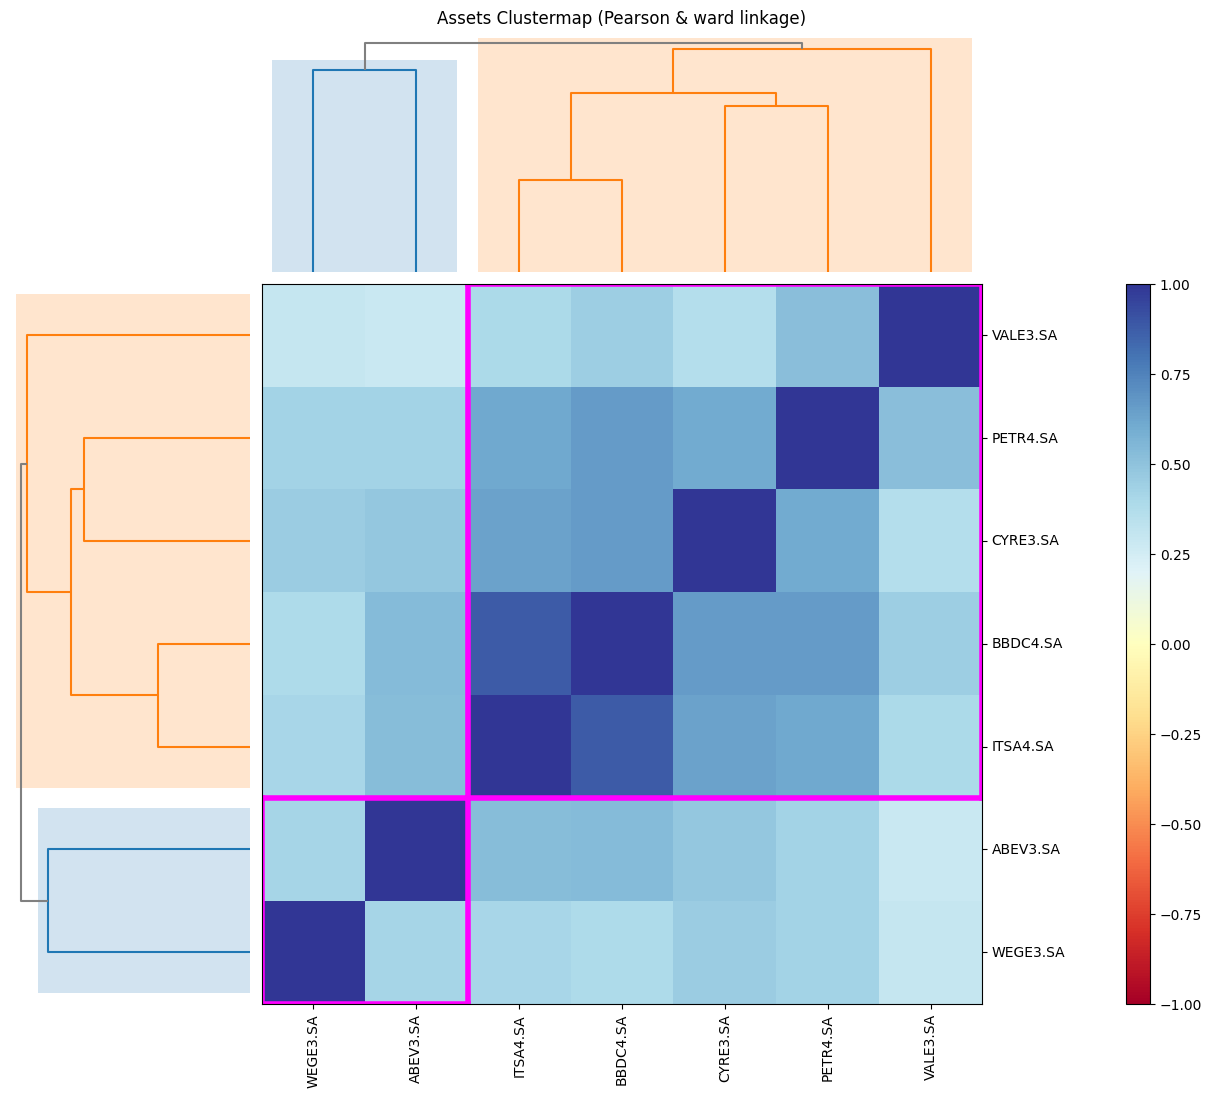

In [ ]:
ax = rp.plot_clusters(returns=retornos_in,
                      codependence='pearson',
                      linkage='ward',
                      k=None,
                      max_k=10,
                      leaf_order=True,
                      dendrogram=True,
                      ax=None)

##Indicadores

/usr/local/lib/python3.9/dist-packages/riskfolio/src/PlotFunctions.py:643: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sizes2 = sizes2.append(item)


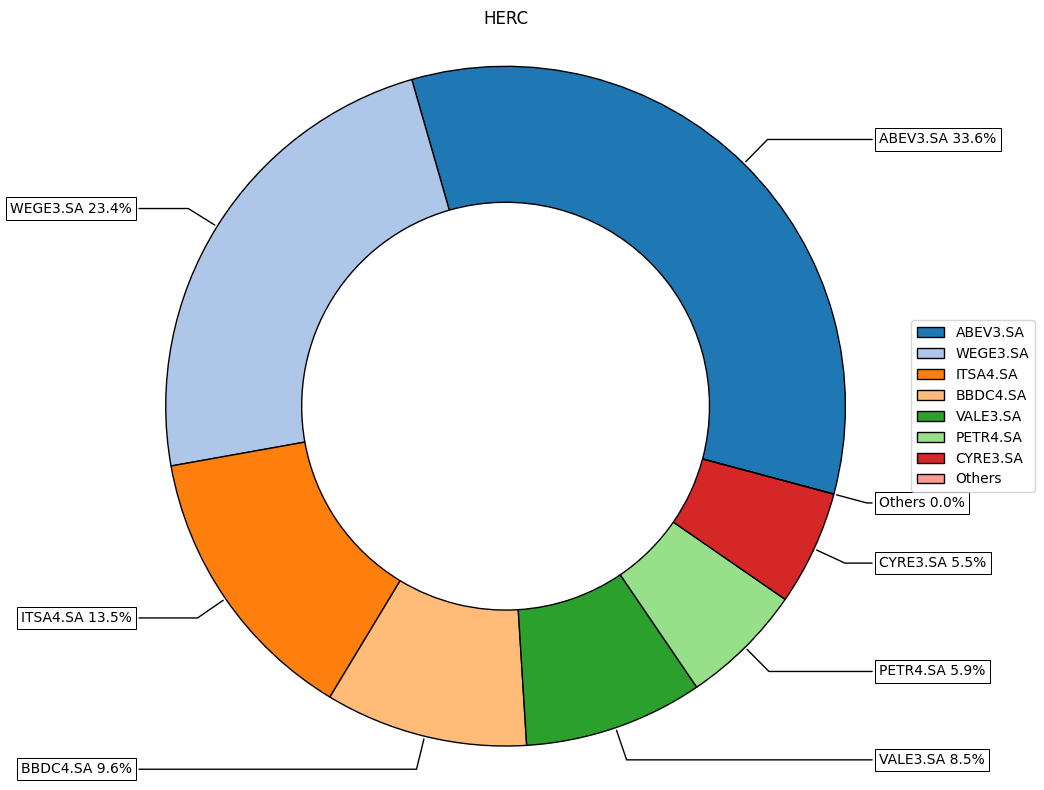

In [ ]:
#percentuais de peso
ax = rp.plot_pie(w=pesos,
             title='HERC',
             others=0.05,
             nrow=25,
             cmap='tab20',
             height=8,
             width=10,
             ax=None)

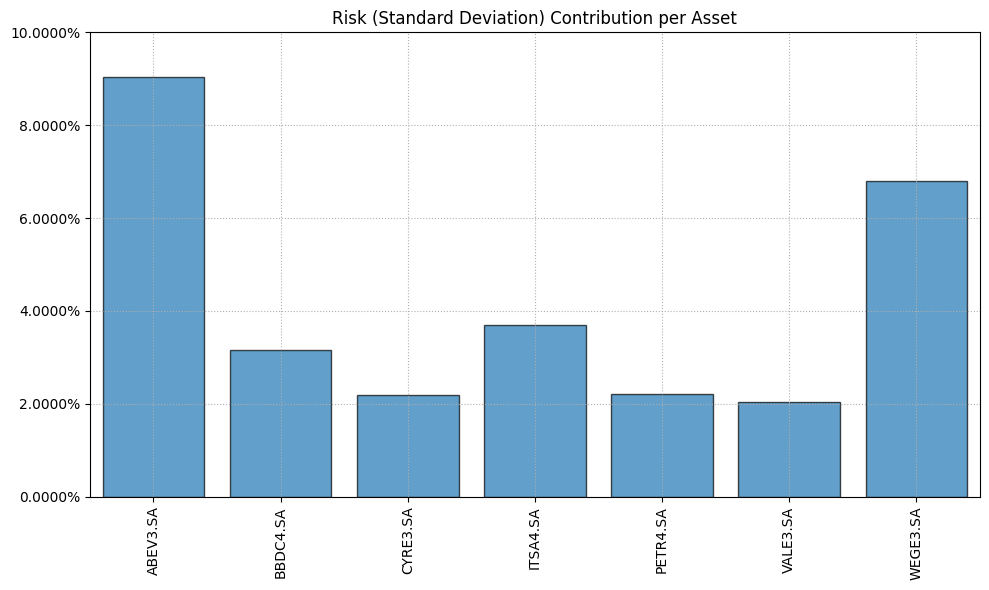

In [ ]:
#Contribuição marginal de risco

mu = retornos_in.mean()
cov = retornos_in.cov()


ax = rp.plot_risk_con(w=pesos,
                      cov=cov,
                      returns=retornos_in,
                      rm='MV',
                      rf=0,
                      alpha=0.05,
                      color='tab:blue',
                      height=6,
                      width=10,
                      t_factor=252,
                      ax=None)

<Axes: title={'center': 'Portfolio Returns Histogram'}, ylabel='Probability Density'>

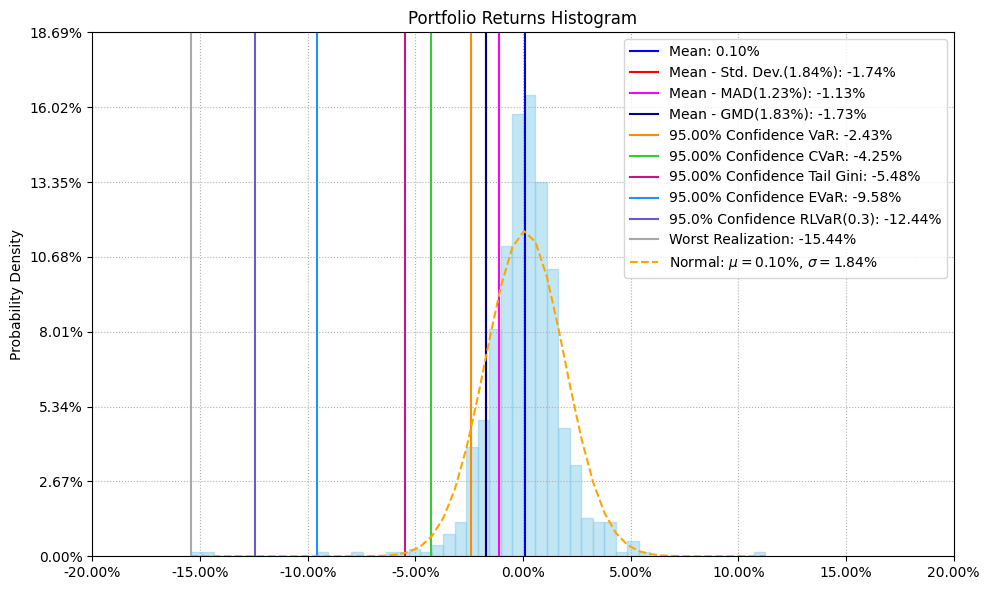

In [ ]:
#Gráfico de distribuição dos retornos

rp.plot_hist(returns=retornos_in, w=pesos, alpha=0.05, bins=50, height=6, width=10, ax=None)

##Backtesting

In [ ]:
pip install vectorbt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.7/485.7 kB 8.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.8/293.8 kB 14.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 43.0 MB/s eta 0:00:00
  Created wheel for vectorbt: filename=vectorbt-0.24.5-py3-none-any.whl size=526801 sha256=f2a4830a11c487b61e79c3b4e383a0eeec39388395e060a178e7078396ac9237
  Stored in directory: /root/.cache/pip/wheels/be/6a/39/9fe1027502bf84c884fcc956eaabdc6196d78daac11ce28f74
Successfully built vectorbt


In [ ]:
import vectorbt as vbt

In [ ]:
#Setup out-of-sample

data_inicio = '2021-01-01'
data_fim = '2023-03-31'

carteira_out = yf.download(ativos, start=data_inicio, end=data_fim)['Adj Close']
carteira_out.head()

[*********************100%***********************]  7 of 7 completed


,ABEV3.SA,BBDC4.SA,CYRE3.SA,ITSA4.SA,PETR4.SA,VALE3.SA,WEGE3.SA
Date,,,,,,,
2021-01-04,14.085717,19.508539,26.252213,8.806286,13.732214,69.413040,35.984749
2021-01-05,14.385996,19.389593,25.745592,8.737668,14.268962,70.581810,38.193413
2021-01-06,14.677172,20.032221,25.082376,8.913033,14.297462,72.896599,39.206116
2021-01-07,14.604378,20.564056,25.238968,9.271383,14.724958,77.655174,40.826439
2021-01-08,15.041145,20.386782,26.445648,9.248510,14.781960,77.412323,43.295506


In [ ]:
pesos

,weights
ABEV3.SA,0.336176
BBDC4.SA,0.096364
CYRE3.SA,0.054568
ITSA4.SA,0.135344
PETR4.SA,0.058689
VALE3.SA,0.085185
WEGE3.SA,0.233674


In [ ]:
#Máscara de pesos

import numpy as np

peso = np.array(pesos.values)
peso

array([[0.33617609],
       [0.09636384],
       [0.05456844],
       [0.13534397],
       [0.0586888 ],
       [0.08518496],
       [0.2336739 ]])

In [ ]:
tamanho_herc = np.full_like(carteira_out, np.nan)
tamanho_herc

array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])

In [ ]:
tamanho_herc[0,:] = np.concatenate(peso)
tamanho_herc

array([[0.33617609, 0.09636384, 0.05456844, ..., 0.0586888 , 0.08518496,
        0.2336739 ],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       ...,
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan]])

In [ ]:
#Backtesting

pf = vbt.Portfolio.from_orders(
    close=carteira_out,
    size=tamanho_herc,
    size_type='targetpercent',
    group_by=True,
    cash_sharing=True
)

In [ ]:
#Estatísticas

pf.stats(settings=dict(risk_free=0, freq='d'))

Start                         2021-01-04 00:00:00
End                           2023-03-30 00:00:00
Period                          559 days 00:00:00
Start Value                                 100.0
End Value                              104.928154
Total Return [%]                         4.928154
Benchmark Return [%]                     4.166407
Max Gross Exposure [%]                      100.0
Total Fees Paid                               0.0
Max Drawdown [%]                        25.241124
Max Drawdown Duration           454 days 00:00:00
Total Trades                                    7
Total Closed Trades                             0
Total Open Trades                               7
Open Trade PnL                           4.928154
Win Rate [%]                                  NaN
Best Trade [%]                                NaN
Worst Trade [%]                               NaN
Avg Winning Trade [%]                         NaN
Avg Losing Trade [%]                          NaN


In [ ]:
pf.plot().show()

In [ ]:
pf.drawdowns.plot(top_n=3).show()

In [ ]:
pf.plot_underwater().show()